In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Basic data cleaning and exploration:
# Loading Data from google drive.

df1=pd.read_csv("/content/drive/MyDrive/Data sets/campaign - campaign.csv")

In [ ]:
df1.shape

(2239, 27)

In [ ]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,SP


In [ ]:
df1.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379
std,3246.372471,11.985494,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [ ]:
df1['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900])

In [ ]:
df1.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
48,340,1970,Graduation,Divorced,"$72,967.00",0,1,12/15/12,1,158,35,179,0,0,125,2,7,2,8,5,1,0,0,0,0,0,GER
1202,3598,1972,Graduation,Married,"$62,710.00",0,1,5/23/13,53,441,35,83,7,29,11,4,4,2,12,4,0,0,0,0,0,0,SP
1263,1045,1965,Graduation,Together,"$52,117.00",0,1,8/16/12,55,112,10,107,30,0,20,2,5,2,4,7,0,0,0,0,0,0,SP
556,5991,1949,Master,Married,"$48,150.00",0,1,6/8/13,24,173,2,39,3,2,47,3,5,1,4,7,0,0,0,0,0,0,GER
428,11056,1974,Graduation,Married,"$72,099.00",0,0,10/27/12,18,546,91,410,119,0,22,1,3,4,10,1,0,0,0,0,0,0,SP
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP
1492,10704,1969,Graduation,Single,"$54,803.00",0,1,8/21/12,65,404,0,92,28,27,142,2,6,2,9,4,0,0,0,0,0,0,SP
1538,2544,1951,Master,Divorced,"$57,530.00",0,1,10/12/13,68,50,1,27,6,7,1,1,1,1,4,1,0,0,0,0,0,0,IND
1857,1612,1981,PhD,Single,$nan,1,0,5/31/13,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,AUS
327,9701,1988,Graduation,Together,"$41,883.00",1,0,3/19/13,13,32,34,41,73,16,116,3,4,2,3,7,0,0,0,0,0,0,CA


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df1['Income']

,Income
0,"$84,835.00"
1,"$57,091.00"
2,"$67,267.00"
3,"$32,474.00"
4,"$21,474.00"
...,...
2234,"$66,476.00"
2235,"$31,056.00"
2236,"$46,310.00"
2237,"$65,819.00"


In [ ]:
# Replace $ sign

df1['Income'] = df1['Income'].str.replace('$', '').str.replace(',', '').astype(float)
df1['Income']

,Income
0,84835.0
1,57091.0
2,67267.0
3,32474.0
4,21474.0
...,...
2234,66476.0
2235,31056.0
2236,46310.0
2237,65819.0


In [ ]:
df1['spendings'] = df1['MntWines']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntFishProducts']+df1['MntSweetProducts']+df1['MntGoldProds']
df1['spendings']

,spendings
0,1190
1,577
2,251
3,11
4,91
...,...
2234,689
2235,55
2236,309
2237,1383


In [ ]:
df1['Age'] = 2023 - df1['Year_Birth']
df1['Age']

,Age
0,53
1,62
2,65
3,56
4,34
...,...
2234,47
2235,46
2236,47
2237,45


In [ ]:
df1['Marital_case']=df1['Marital_Status'].replace({"Divorced":'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':"Alone"})
df1['Marital_case']


,Marital_case
0,Alone
1,Alone
2,Couple
3,Couple
4,Alone
...,...
2234,Alone
2235,Couple
2236,Alone
2237,Couple


In [ ]:
df1['Having_kids'] = np.where(df1['Kidhome']+ df1['Teenhome'] > 0, 'YES', "NO")
df1['Having_kids']

,Having_kids
0,NO
1,NO
2,YES
3,YES
4,YES
...,...
2234,YES
2235,YES
2236,YES
2237,NO


In [ ]:
df1[['Income','spendings','Age']].describe()

,Income,spendings,Age
count,2215.000000,2239.000000,2239.000000
mean,51969.861400,606.041090,54.197856
std,21526.320095,602.274089,11.985494
min,1730.000000,5.000000,27.000000
25%,35284.000000,69.000000,46.000000
50%,51373.000000,396.000000,53.000000
75%,68487.000000,1046.000000,64.000000
max,162397.000000,2525.000000,130.000000


In [ ]:
mean_income = df1['Income'].mean()
mean_spendings = df1['spendings'].mean()
mean_age = df1['Age'].mean()
print(f"Mean Income: {mean_income}")
print(f"Mean Spendings: {mean_spendings}")
print(f"Mean Age: {mean_age}")

Mean Income: 51969.861399548536
Mean Spendings: 606.0410897722197
Mean Age: 54.19785618579723


In [ ]:
df1['Income_bracket'] = 'Above mean'
df1.loc[df1['Income'] < mean_income, 'Income_bracket'] = 'Below mean'
df1['Income_bracket']



,Income_bracket
0,Above mean
1,Above mean
2,Above mean
3,Below mean
4,Below mean
...,...
2234,Above mean
2235,Below mean
2236,Below mean
2237,Above mean


# **Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)**

In [ ]:
df1['EverAcceptedCampaign'] = (df1[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']] ==1).any(axis=1)
df1['EverAcceptedCampaign']

,EverAcceptedCampaign
0,False
1,True
2,False
3,False
4,True
...,...
2234,False
2235,False
2236,False
2237,False


In [ ]:
contingency_table = pd.crosstab(df1['EverAcceptedCampaign'], df1['Income_bracket'])
contingency_table

Income_bracket,Above mean,Below mean
EverAcceptedCampaign,,
False,770,1006
True,345,118


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 141.37659987264502
P-value: 1.3310467690679514e-32
Degrees of Freedom: 1
Expected Frequencies:
[[884.43054935 891.56945065]
 [230.56945065 232.43054935]]


In [ ]:
if p_value < 0.05:
    print("There is a significant association between EverAcceptedCampaign and Income_bracket.")
else:
    print("There is no significant association between EverAcceptedCampaign and Income_bracket.")

There is a significant association between EverAcceptedCampaign and Income_bracket.


In [ ]:
acceptance_rate = df1.groupby('EverAcceptedCampaign')['Income_bracket'].value_counts(normalize=True)
acceptance_rate

EverAcceptedCampaign  Income_bracket
False                 Below mean        0.566441
                      Above mean        0.433559
True                  Above mean        0.745140
                      Below mean        0.254860
Name: proportion, dtype: float64

In [ ]:
acceptance_rate = df1.groupby('Income_bracket')['EverAcceptedCampaign'].mean()
acceptance_rate

,EverAcceptedCampaign
Income_bracket,
Above mean,0.309417
Below mean,0.104982


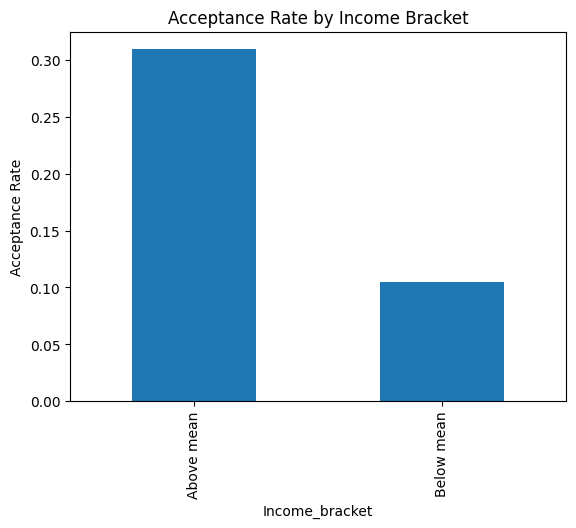

In [ ]:
# Using bar chart
acceptance_rate.plot(kind='bar')
plt.xlabel('Income_bracket')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Income Bracket')
plt.show()

# **Do higher income people spend more (take in account spending in all categories together)**

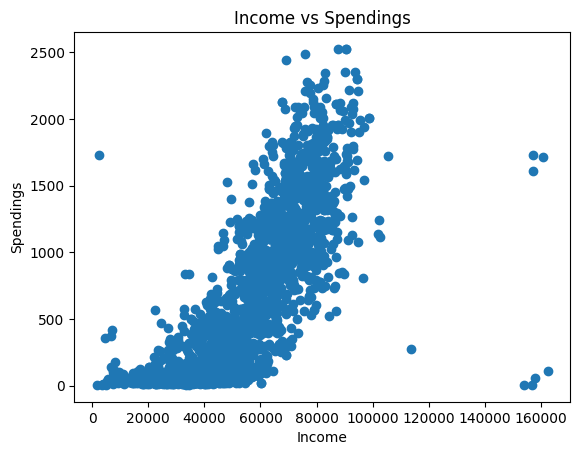

In [ ]:
plt.scatter(df1['Income'],df1['spendings'])
plt.xlabel('Income')
plt.ylabel('Spendings')
plt.title('Income vs Spendings')
plt.show()

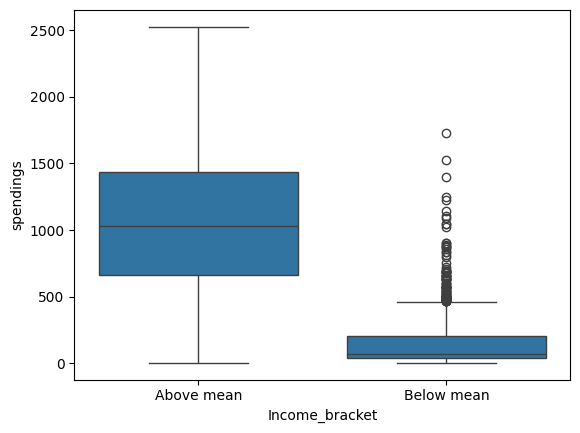

In [ ]:
sns.boxplot(x='Income_bracket',y='spendings',data=df1)
plt.show()

# **Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')**

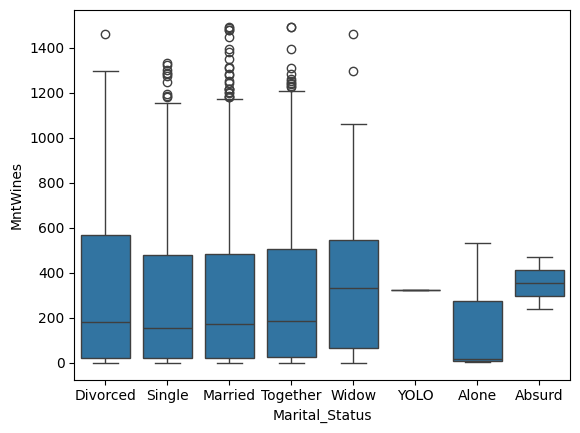

In [ ]:
sns.boxplot(x='Marital_Status',y='MntWines',data=df1)
plt.show()

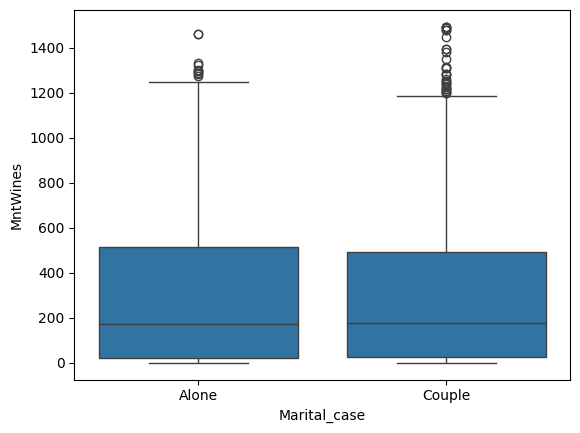

In [ ]:
sns.boxplot(x='Marital_case',y='MntWines',data=df1)
plt.show()

In [ ]:
Alone = df1[df1['Marital_case'] == 'Alone']['MntWines']
Couple = df1[df1['Marital_case'] == 'Couple']['MntWines']


In [ ]:
f_statistic, p_value = stats.f_oneway(Alone, Couple)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 0.07356354253693509
P-value: 0.7862422428080872


In [ ]:
if p_value < 0.05:
    print("There is a significant difference in MntWines between Alone and Couple marital status groups.")
else:
    print("There is no significant difference in MntWines between Alone and Couple marital status groups.")

There is no significant difference in MntWines between Alone and Couple marital status groups.


# **Is income of customers dependent on their education**

In [ ]:
# Is income of customers dependent on their education

contingency_table = pd.crosstab(df1['Education'], df1['Income_bracket'])
contingency_table

Income_bracket,Above mean,Below mean
Education,,
2n Cycle,88,115
Basic,0,54
Graduation,569,557
Master,181,189
PhD,277,209


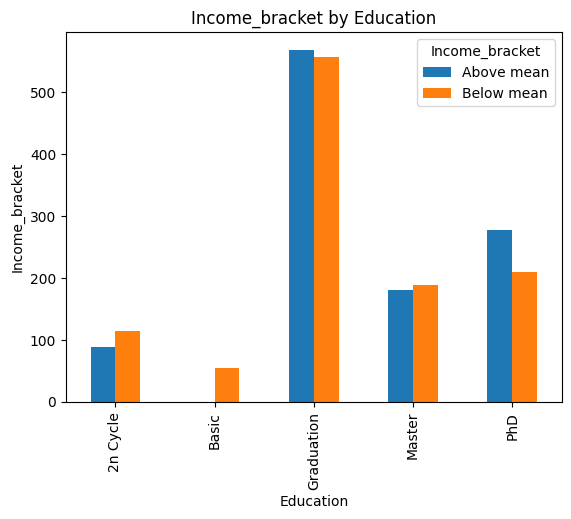

In [ ]:
# Using bar chart
contingency_table.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Income_bracket')
plt.title('Income_bracket by Education')
plt.show()

In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 67.37130728725926
P-value: 8.140599452247758e-14
Degrees of Freedom: 4
Expected Frequencies:
[[101.09200536 101.90799464]
 [ 26.89146941  27.10853059]
 [560.73693613 565.26306387]
 [184.25636445 185.74363555]
 [242.02322465 243.97677535]]


In [ ]:
if p_value < 0.05:
    print("There is a significant association between Education and Income_bracket.")
else:
    print("There is no significant association between Education and Income_bracket.")

There is a significant association between Education and Income_bracket.
